<p><a name="PCA"></a></p>

# 2. Análisis de Componentes Principales (PCA)
PCA es un método que consiste en rotar el dataset de tal forma que las componentes rotadas son estadisticamente no-correlacionadas. Si se desea también reducir la dimensionalidad, esta rotación es seguida de una selección de un subconjunto de características de acuerdo con su importancia.

## 2.1. Intuición inicial
Tenemos los siguientes datos 2D y nos gustaría encontrar una proyección en 1D que preserve la máxima cantidad de variabilidad.

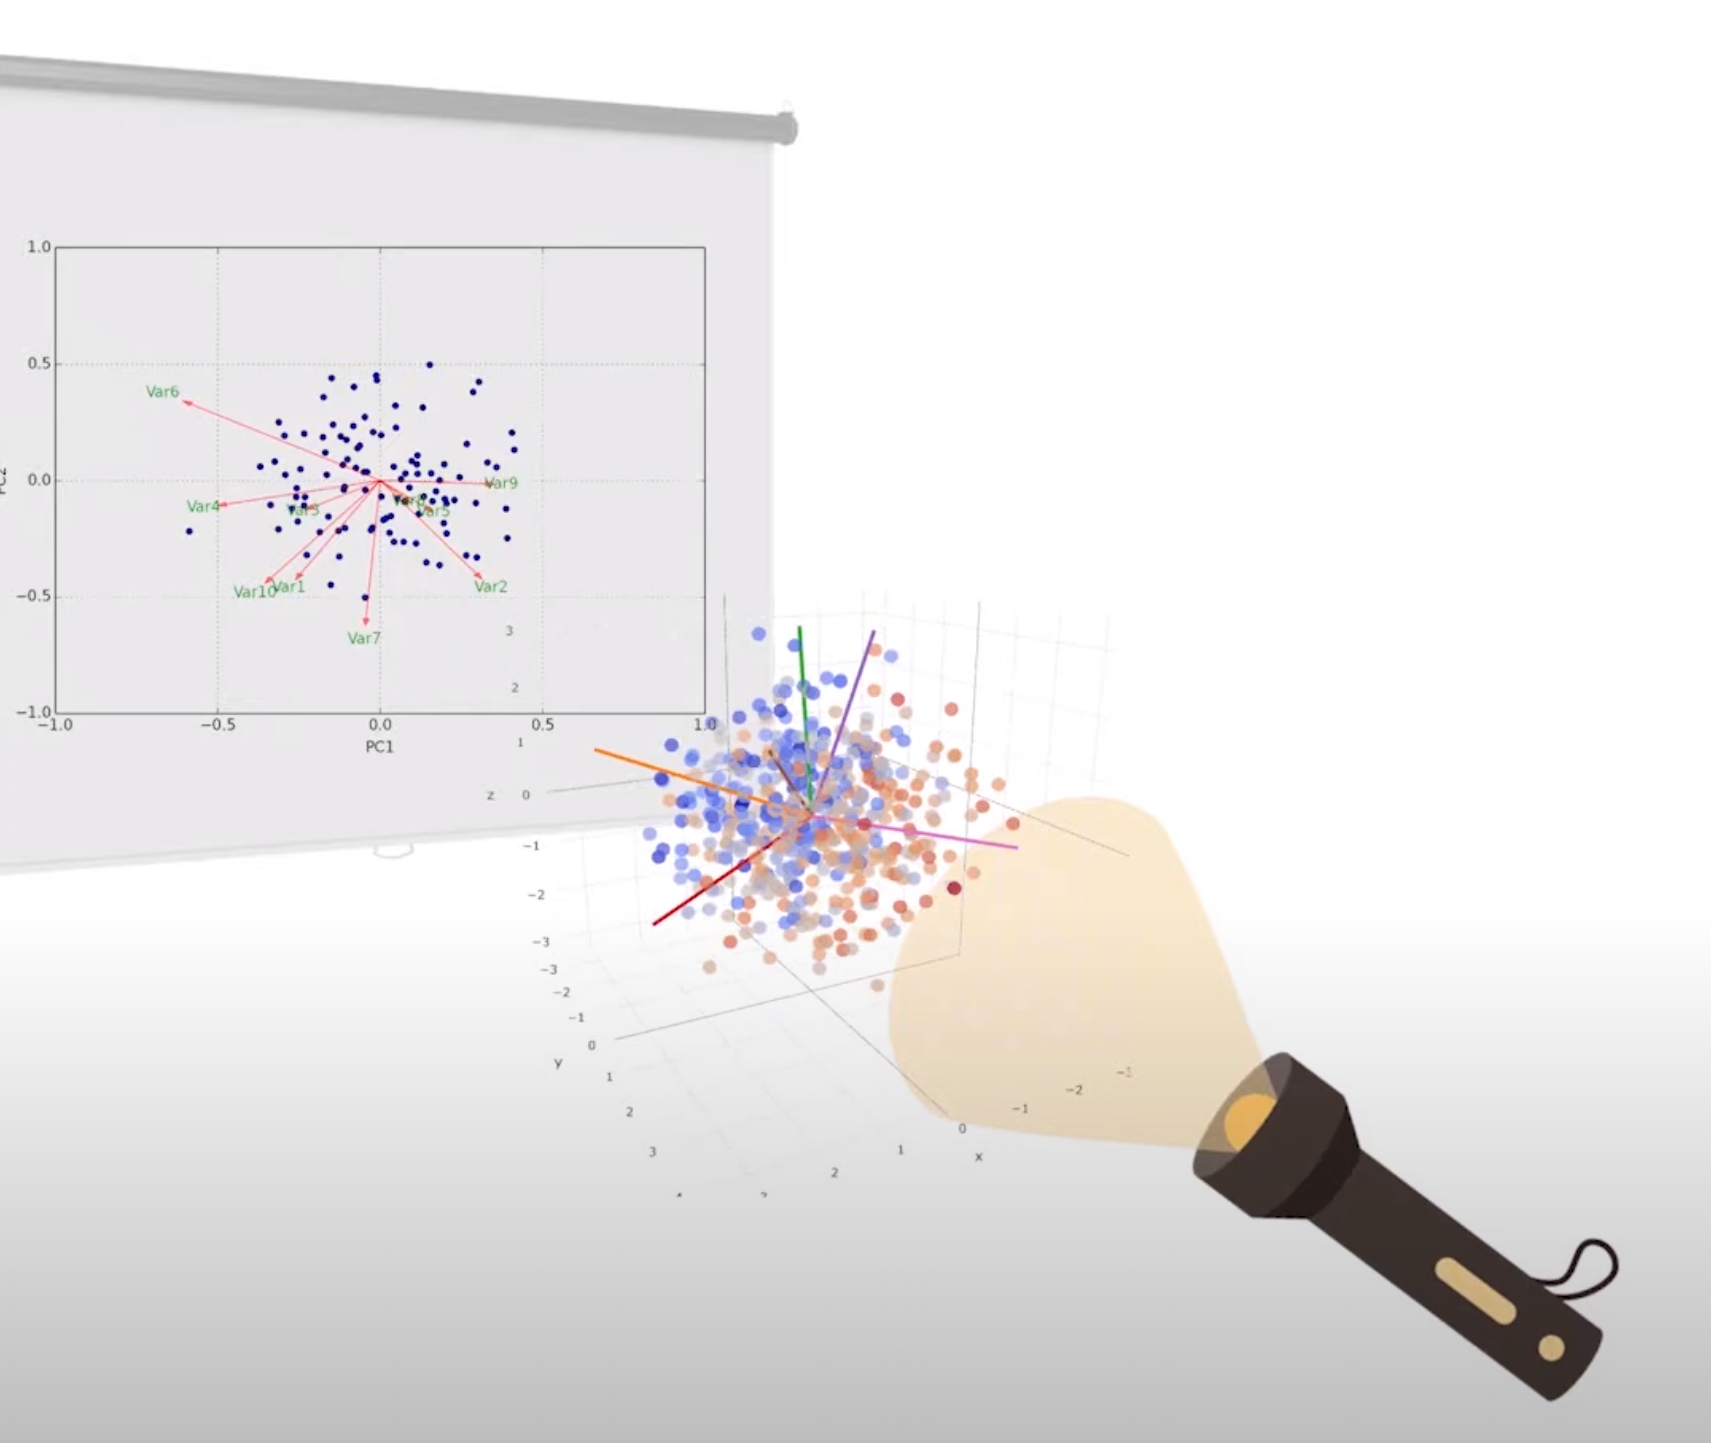

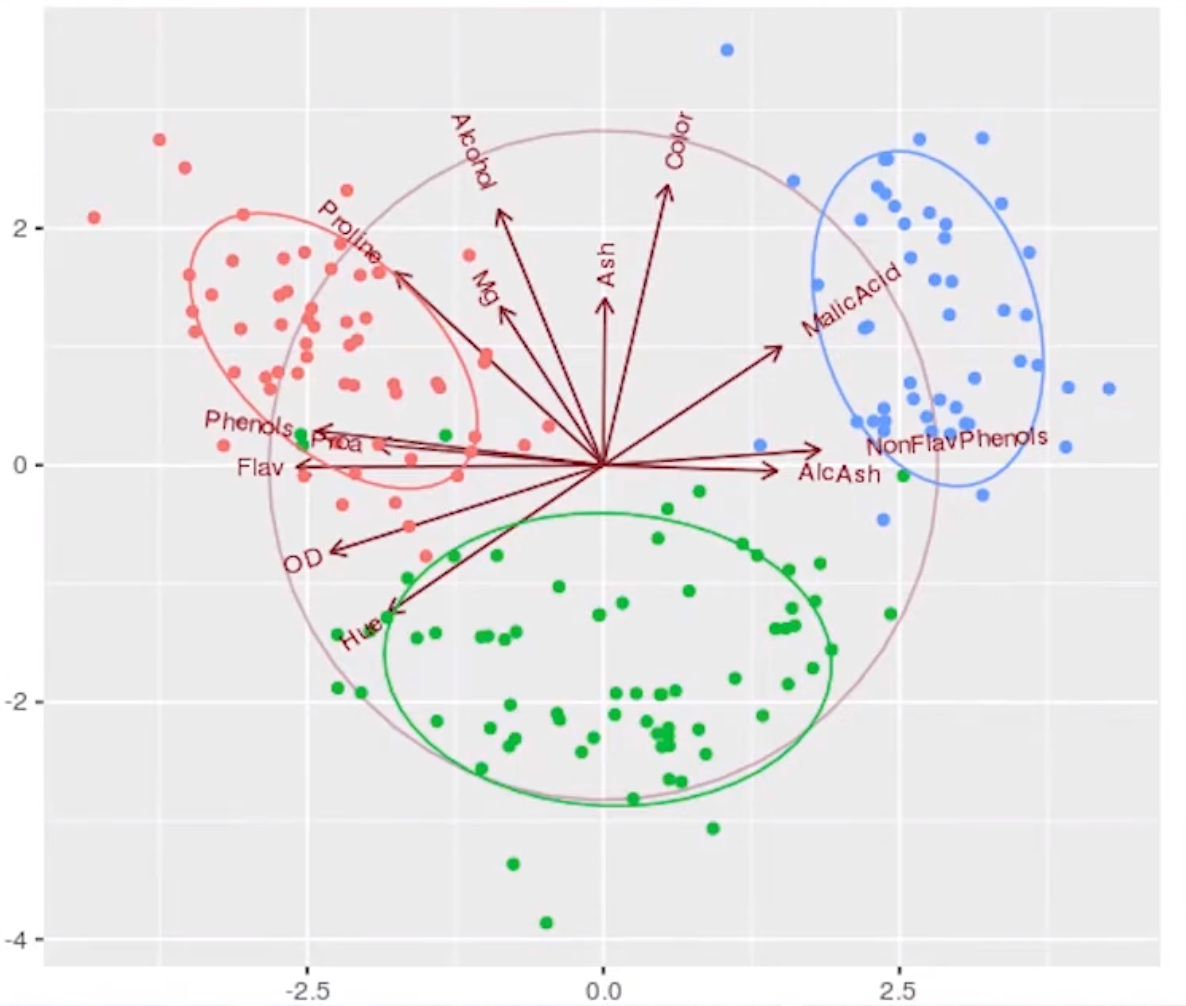

In [2]:
import mglearn # mglearn es un paquete que contiene funciones para graficar y datos de ejemplo 

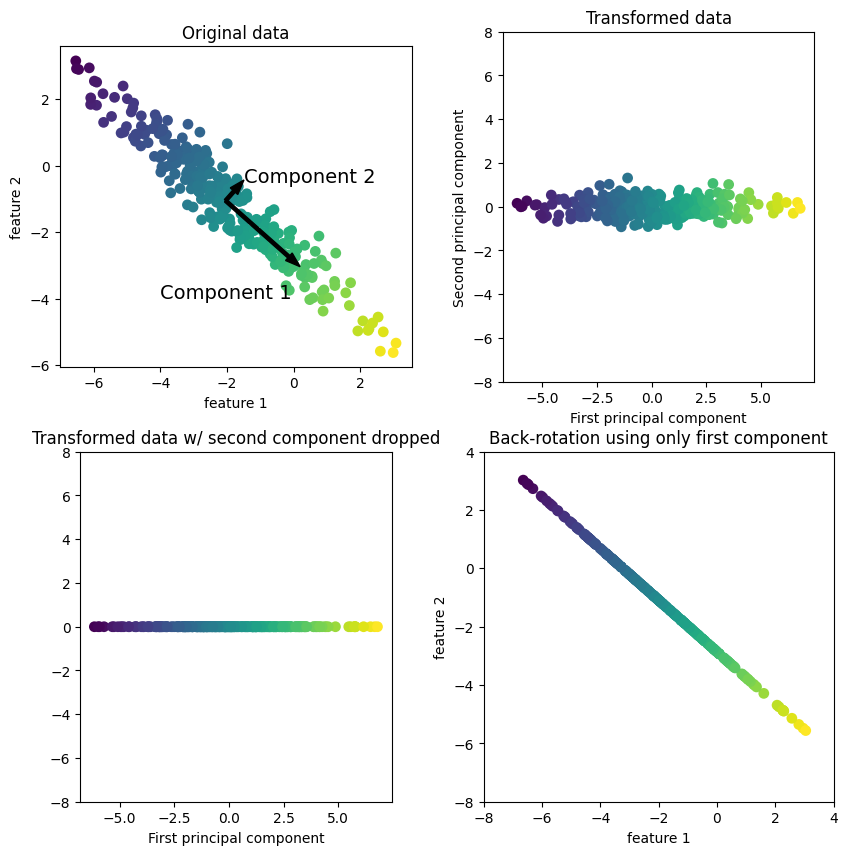

In [3]:
mglearn.plots.plot_pca_illustration() # aqí se ve la proyección de los datos en la dirección de la varianza máxima (la dirección de la flecha) y la dirección de la varianza mínima (la dirección perpendicular a la flecha)

## 2.2. Intuición práctica

(200, 2)


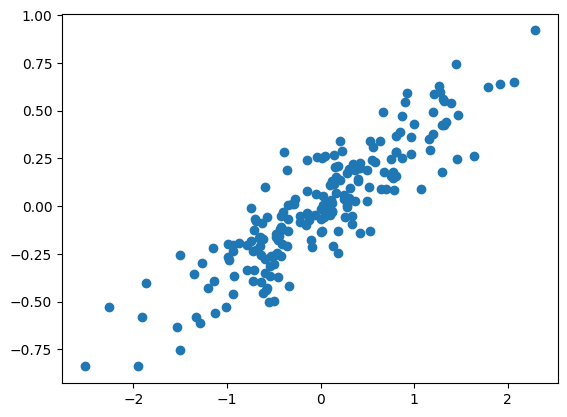

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T+10 # crea una matriz de 2x2 con numeros aleatorios y la multiplica por una matriz de 2x200 con numeros aleatorios y la transpone. 
                                                                                # Luego le suma 10 a todos los elementos de la matriz

X = X-np.mean(X, axis=0)
print (X.shape)
plt.scatter(X[:,0], X[:,1]);

Inspeccionamos algunas proyecciones

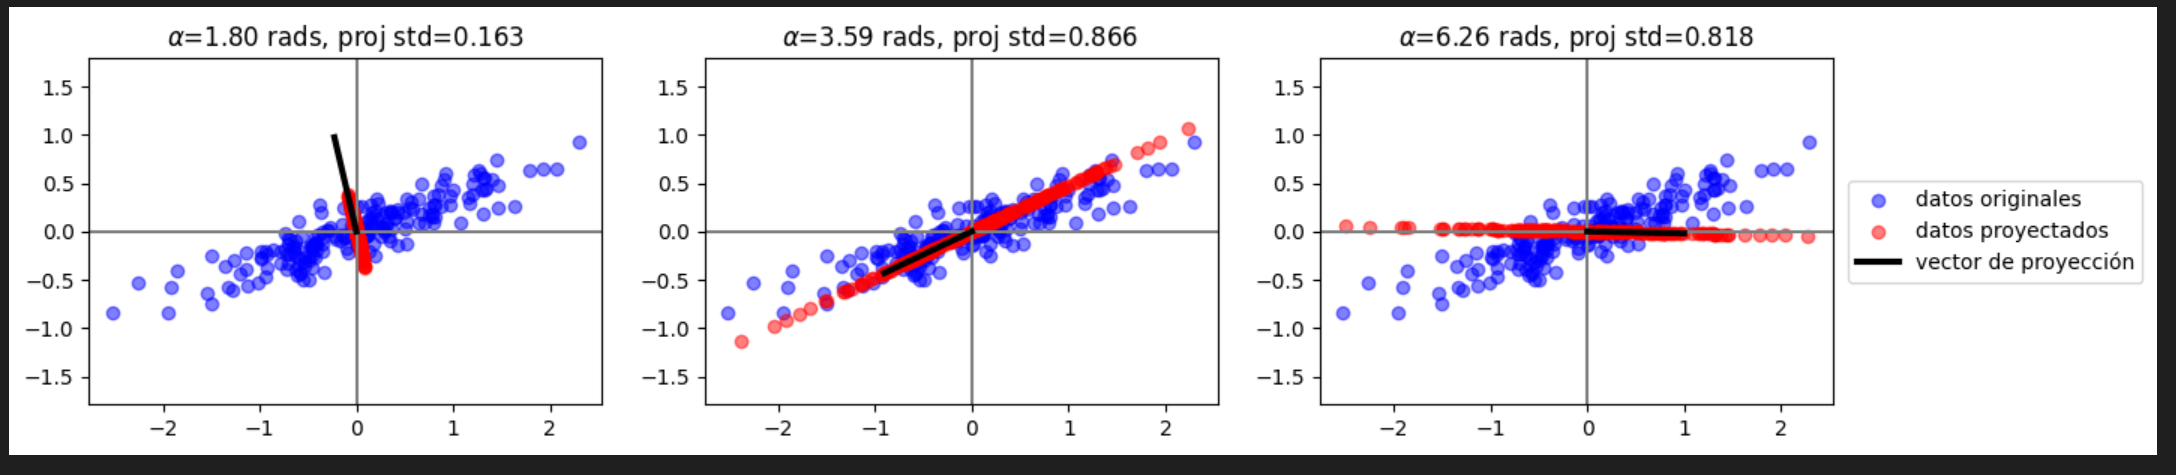

Implementemos PCA y veamos los resultados que obtenemos para dos y una componente.

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)
pca.fit(X)
print("Componentes")
print(pca.components_) # Vectores propios (autovectores)
print("Norma de las componentes") 
print(pca.explained_variance_) # Autovalores (varianza explicada)

Componentes
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
Norma de las componentes
[0.7625315 0.0184779]


In [8]:
pca = PCA(n_components=1)
pca.fit(X)
print("Componentes")
print(pca.components_) # los vectores de las componentes 
print("Norma de las componentes") 
print(pca.explained_variance_) # la varianza de cada componente

Componentes
[[-0.94446029 -0.32862557]]
Norma de las componentes
[0.7625315]


Las componentes principales corresponden a las direcciones en los datos originales, por lo tanto son combinaciones de las características originales. Cada fila en `components_` corresponde a una componente principal y se organizan dependiendo de su importancia. Asímismo, cada columna corresponde a cada una de las caraterísticas originales. Las entradas de `explained_variance_` corresponden a la norma de los vectores de las componentes principales, los cuales indican que tan "importante" es el respectivo eje en la descripción de la distribución de los datos. 


Veamos ahora como quedan nuestros datos transformados.

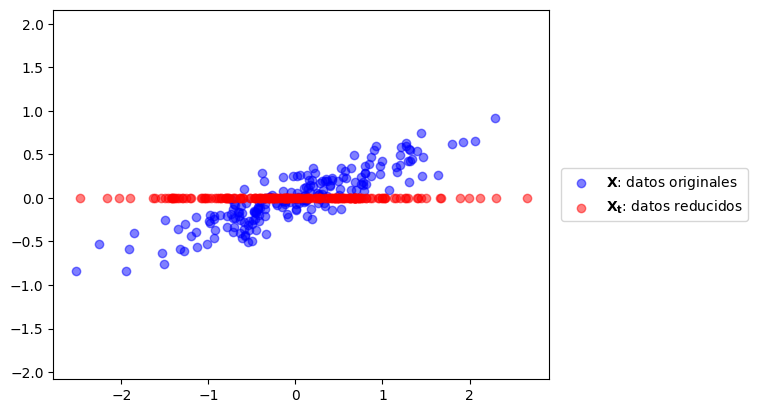

In [9]:
Xt = pca.transform(X)
plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="$\mathbf{X}$: datos originales") # X en el espacio de dimensión 2 (eje x y eje y) 
plt.scatter(Xt, [0]*len(Xt), color="red", alpha=.5, label="$\mathbf{X_t}$: datos reducidos") # X transformados en el nuevo espacio de dimensión 1 (eje x) y 0 (eje y) 
plt.axis("equal");
plt.legend(loc="center left", bbox_to_anchor=(1.01,.5));

y podemos también reconstruir los datos 2D después de la transformación

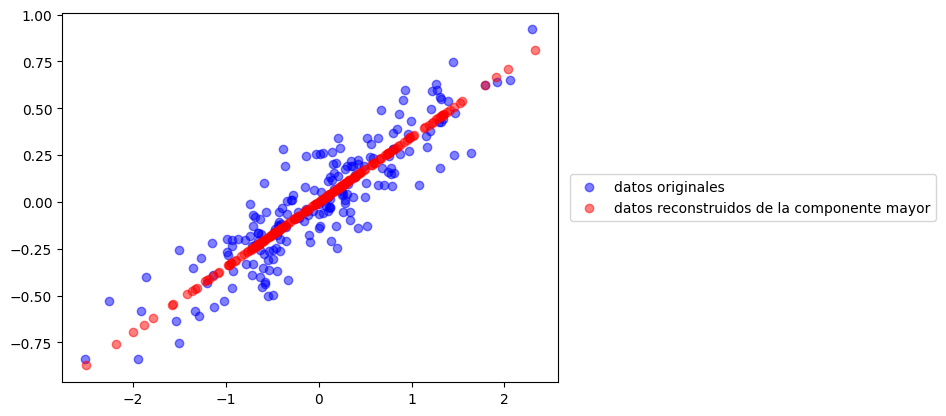

In [10]:
Xr = pca.inverse_transform(Xt)
plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="datos originales")
plt.scatter(Xr[:,0], Xr[:,1], color="red", alpha=.5, label="datos reconstruidos de la componente mayor")
plt.legend(loc="center left", bbox_to_anchor=(1.01,.5));

## 2.3. Usando PCA para visualizar datos multidimensionales

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.decomposition import PCA

In [12]:
# cargamos los datos y los estandarizamos
cancer = load_breast_cancer() 

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [13]:
np.shape(cancer.data)

(569, 30)

In [14]:
np.shape(X_scaled)

(569, 30)

In [15]:
# aplicamos PCA con dos componentes principales
pca = PCA(n_components=2)

pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Forma original: {}".format(str(X_scaled.shape)))
print("Forma reducida: {}".format(str(X_pca.shape)))

Forma original: (569, 30)
Forma reducida: (569, 2)


Text(0, 0.5, 'PCA2')

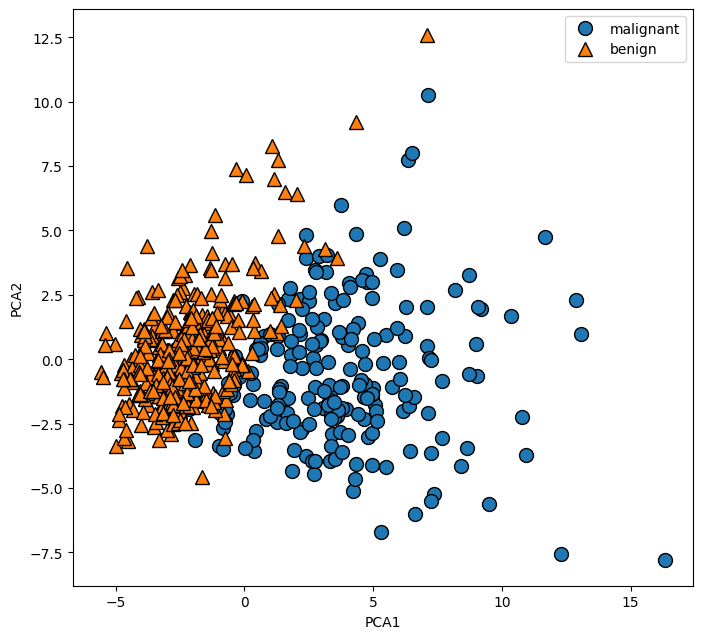

In [16]:
# graficamos en el espacio de las componentes
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

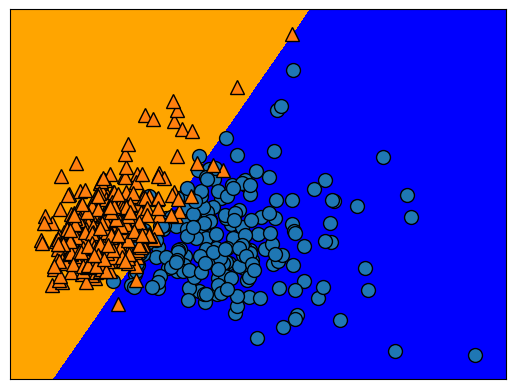

In [17]:
# entrenamos un regresor LG
clf = LogisticRegression(solver="liblinear") # solver="lbfgs" es el default pero no funciona con "multinomial" y "ovr" (one vs rest) 
clf.fit(X_pca,cancer.target)

mglearn.plots.plot_2d_classification(clf,X_pca,fill=True, cm=ListedColormap(['blue','orange']))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.show();

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X_pca,cancer.target,
                                                  test_size=0.2,random_state=10)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print (classification_report(y_test,y_pred))
print (confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        39
           1       0.96      0.97      0.97        75

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[36  3]
 [ 2 73]]


In [19]:
print("Forma original: {}".format(str(X_scaled.shape)))
print("Forma reducida: {}".format(str(X_pca.shape)))

Forma original: (569, 30)
Forma reducida: (569, 2)


Veamos ahora los resultados de la clasificación si no hubiesemos hecho la reducción de dimensionalidad con PCA.

In [20]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled,cancer.target,
                                                  test_size=0.2,random_state=10)

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print (classification_report(y_test,y_pred))
print (confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        39
           1       0.97      0.97      0.97        75

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

[[37  2]
 [ 2 73]]


Vemos que en ambos casos obtenemos resultados muy similares. Para tener una mejor visualización del número estimado de componentes que se necesitan para describir los datos, podemos utilizar lo que se conoce como razón de la varianza acumulativa en función del número de componentes:

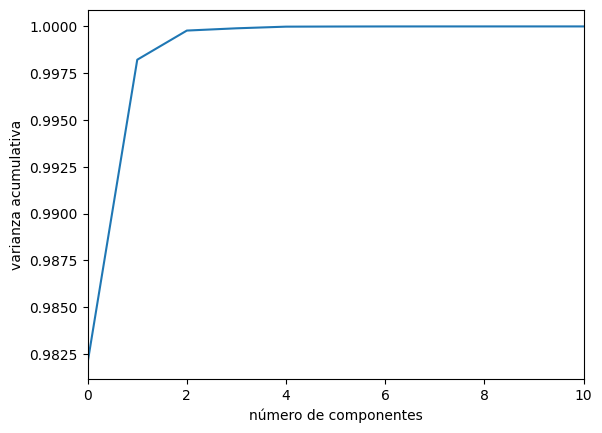

0.0

In [21]:
pca = PCA().fit(cancer.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('número de componentes')
plt.ylabel('varianza acumulativa')
plt.xlim(0, 10)
plt.show();.0

La curva cuantifica cuánto de la varianza total está contenida en las primeras N componentes. Observamos que, en este caso, las dos primeras componentes contienen alrededor del 99% de la varianza, y se necesitan alrededor de tres componentes para describir cerca del 100% de la varianza. 

Aternativamente, el hiperparámetro `n_components` puede ser usado en el rango (0,1), con lo cual se indica al modelo que contenga un cierto porcentaje de la varianza, y el modelo nos devolverá el número de componentes necesarias para tener ese porcentaje de varianza:  

In [22]:
# reteniendo el 50 % de la varianza
pca = PCA(n_components=0.5).fit(cancer.data)

print("Número de componentes: ",pca.n_components_)

Número de componentes:  1


Podemos concluir entonces que para este dataset, haber tomado solo dos componentes principales permite visualizar que la separación de los datos es lineal sin perder calidad en los resultados.